# Econometric UNFCCC Green Cities Commitment Analysis: USA
## Econometric Analysis

In [37]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
import shap

#### 1. Load and Prepare Data

In [30]:
df_all = pd.read_csv('allcities.csv')
df_unfccc = pd.read_csv('UNFCCC.csv')

In [32]:
def BooltoZeroOne(df):
    for column in df.columns:
        if df[column].dtype == bool:
            df[column] = df[column].astype(int)

In [33]:
BooltoZeroOne(df_all)
BooltoZeroOne(df_unfccc)

#### 2. Define Model Fitting Functions

In [42]:
def FitLogistic(df, y_var, X_vars):
    df = df.dropna()
    X = df[X_vars]
    scaler = StandardScaler()
    X = scaler.fit_transform(X)
    X = sm.add_constant(X)
    y = df[y_var]
    model = sm.Logit(y, X).fit(cov_type = 'HC3')
    print(model.summary())

def FitRandomForest(df, y_var, X_vars):
    df = df.dropna()
    X = df[X_vars]
    scaler = StandardScaler()
    X = scaler.fit_transform(X)
    y = df[y_var]
    rf = RandomForestRegressor()
    model = rf.fit(X, y)
    return pd.DataFrame({
        'Feature':X_vars,
        'Importance':model.feature_importances_
    }).sort_values(by = 'Importance', ascending = False)

#### 3. Analysing Determinants of Cities to Sign up to the UNFCC


In [43]:
FitLogistic(df_all, y_var = 'UNFCCC', X_vars = ['population','redCounty','redState','unemploymentRate','povertyProp','tempDiff','numDisasters','avgEmissionsPerCapita','lessThanHighSchoolProp','medianHouseholdIncome']) # ,'medianAge','whiteProp'

Optimization terminated successfully.
         Current function value: 0.051165
         Iterations 10
                           Logit Regression Results                           
Dep. Variable:                 UNFCCC   No. Observations:                14546
Model:                          Logit   Df Residuals:                    14535
Method:                           MLE   Df Model:                           10
Date:                Sat, 13 Apr 2024   Pseudo R-squ.:                  0.2865
Time:                        22:01:43   Log-Likelihood:                -744.24
converged:                       True   LL-Null:                       -1043.1
Covariance Type:                  HC3   LLR p-value:                5.273e-122
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -5.2138      0.144    -36.304      0.000      -5.495      -4.932
x1             1.3070      0

In [44]:
FitRandomForest(df_all, y_var = 'UNFCCC', X_vars = ['population','redCounty','redState','unemploymentRate','povertyProp','tempDiff','numDisasters','avgEmissionsPerCapita','lessThanHighSchoolProp','medianHouseholdIncome'])  # ,'medianAge','whiteProp'

,Feature,Importance
0,population,0.559852
8,lessThanHighSchoolProp,0.107507
9,medianHouseholdIncome,0.080947
4,povertyProp,0.070551
3,unemploymentRate,0.057434
7,avgEmissionsPerCapita,0.045286
5,tempDiff,0.033987
6,numDisasters,0.029308
1,redCounty,0.012491
2,redState,0.002636


In [45]:
df = df_all
df = df.dropna()
X = df[['population','redCounty','redState','unemploymentRate','povertyProp','tempDiff','numDisasters','avgEmissionsPerCapita','lessThanHighSchoolProp','medianHouseholdIncome']]
X = sm.add_constant(X)
y = df['UNFCCC']
model = sm.Logit(y, X).fit(cov_type = 'HC3')
explainer = shap.Explainer(lambda x: model.predict(x), X)
shap_values = explainer.shap_values(X)

Optimization terminated successfully.
         Current function value: 0.051165
         Iterations 10


PermutationExplainer explainer: 14547it [00:44, 254.94it/s]                           


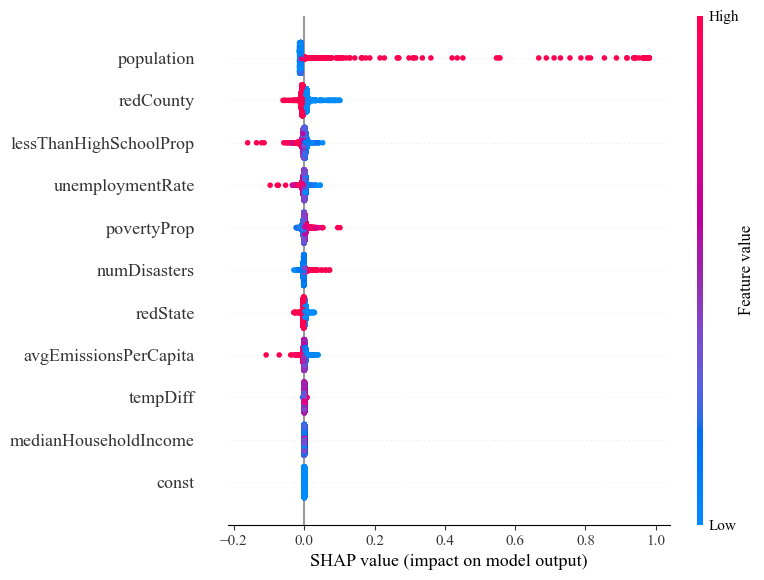

In [46]:
shap.summary_plot(shap_values, X)

#### 4. Analysing Determinants of Cities to Undertake Individual Actions Recorded by the UNFCCC

In [47]:
FitLogistic(df_unfccc, y_var = 'hasCommitments', X_vars = ['population','redCounty','redState','unemploymentRate','povertyProp','tempDiff','numDisasters','avgEmissionsPerCapita','lessThanHighSchoolProp','medianHouseholdIncome']) # ,'medianAge','whiteProp'

Optimization terminated successfully.
         Current function value: 0.498051
         Iterations 9


LinAlgError: Singular matrix

In [48]:
FitRandomForest(df_unfccc, y_var = 'hasCommitments', X_vars = ['population','redCounty','redState','unemploymentRate','povertyProp','tempDiff','numDisasters','avgEmissionsPerCapita','lessThanHighSchoolProp','medianHouseholdIncome']) # ,'medianAge','whiteProp'

,Feature,Importance
0,population,0.330372
9,medianHouseholdIncome,0.156256
8,lessThanHighSchoolProp,0.141066
3,unemploymentRate,0.097340
4,povertyProp,0.096276
7,avgEmissionsPerCapita,0.071413
6,numDisasters,0.049774
5,tempDiff,0.048559
1,redCounty,0.005213
2,redState,0.003731
